## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(num_mice)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop(index=dup_mouse.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Initialize lists
regimens = clean_df["Drug Regimen"].unique()
mean_vol = []
median_vol = []
var_vol = []
std_vol = []
sems = []

# Iterate through the different treatments to calculate the summary statistics
for regimen in regimens:
    regimen_df = clean_df[clean_df["Drug Regimen"]==regimen]
    mean_vol.append(df["Tumor Volume (mm3)"].mean())
    median_vol.append(df["Tumor Volume (mm3)"].median())
    var_vol.append(np.var(df["Tumor Volume (mm3)"],ddof=0))
    std_vol.append(np.std(df["Tumor Volume (mm3)"],ddof=0))
    sems.append(st.sem(df["Tumor Volume (mm3)"]))

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Drug Regimen":regimens,
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Drug Regimen,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
0,Ramicane,54.331565,52.509285,65.817708,8.112811,0.596466
1,Capomulin,54.331565,52.509285,65.817708,8.112811,0.596466
2,Infubinol,54.331565,52.509285,65.817708,8.112811,0.596466
3,Placebo,54.331565,52.509285,65.817708,8.112811,0.596466
4,Ceftamin,54.331565,52.509285,65.817708,8.112811,0.596466
5,Stelasyn,54.331565,52.509285,65.817708,8.112811,0.596466
6,Zoniferol,54.331565,52.509285,65.817708,8.112811,0.596466
7,Ketapril,54.331565,52.509285,65.817708,8.112811,0.596466
8,Propriva,54.331565,52.509285,65.817708,8.112811,0.596466
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df = clean_df.groupby(['Drug Regimen'])

# Use the grouped object to calculate the summary statistics
mean_vol = regimen_df["Tumor Volume (mm3)"].mean()
median_vol = regimen_df["Tumor Volume (mm3)"].median()
var_vol = regimen_df["Tumor Volume (mm3)"].var(ddof=0)
std_vol = regimen_df["Tumor Volume (mm3)"].std(ddof=0)
sems = regimen_df["Tumor Volume (mm3)"].sem()

# Create a dataframe for the summary statistics
summ_stats_df = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": median_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "Standard Error": sems
})

summ_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Create a dataframe indexed by drug treatment to use pandas bar plotting
regimen_count = regimen_df['Mouse ID'].count()
bar_data_df = pd.DataFrame({
    "Count":regimen_count
})




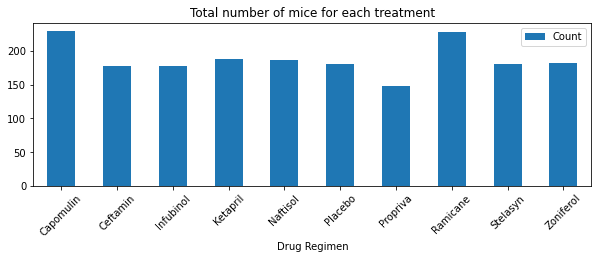

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_data_df.plot(kind='bar',figsize=(10,3),rot=45,width=0.5)
plt.title("Total number of mice for each treatment")

# Save the figure
plt.savefig("Figures/PandaBarChart.png")
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
